In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib import animation
import cartopy.crs as ccrs
from scipy.io import netcdf
from netCDF4 import num2date
from netCDF4 import Dataset as NetCDFFile 

from mpl_toolkits.basemap import Basemap

In [43]:
path='/home/garcia/Documents/PhD/DATA/'
mfiles=  'GOM025-GSL301.050_y1993-2012.1d_gridT.nc','GOM025-GSL301.001_y1993-2012.1d_gridT.nc'
mean_file=path+ mfiles[0]
print(mean_file)

/home/garcia/Documents/PhD/DATA/GOM025-GSL301.050_y1993-2012.1d_gridT.nc


In [118]:
#mean_file = '/home/garcia/Documents/PhD/DATA/GOM025-GSL301.050_y1993-2012.1d_gridT.nc'
fig=plt.figure(figsize=(10.0,3.0))
axes1=fig.add_subplot(1,2,1)
axes2=fig.add_subplot(1,2,2)
ids=0
for item in mfiles:
    
    mean_file=path+ mfiles[ids]
    
    ds = xr.open_dataset(mean_file)
    print(ds.ssh.shape)
    ids=ids+1
    print(ids)
    lats = xr.open_dataset(mean_file)['nav_lat']
    lons = xr.open_dataset(mean_file)['nav_lon']
    time = xr.open_dataset(mean_file)['time_counter']
    sta=1
    mla,mlo=[88,45]
    #plt.gcf().clear()
    mlo
    plot_example_sst(ds.ssh,time,lons,lats,mlo[its],mla[its],ids,its)
    
#fig.savefig('test%s.pdf' %sta)



(7300, 141, 201)
1
[ 0.16372952  0.31616316  0.96238212]
(7300, 141, 201)
2
[ 0.90770801  0.75564927  0.30964523]


In [3]:
#tvar=ncf.variables[('time_centered')][:]
#lats=ncf.variables[('nav_lat')][:]
#lons=ncf.variables[('nav_lon')][:]
#SSH=ncf.variables[('ssh')][:]
#SST=ncf.variables[('sst')][:]

In [3]:
from oocgcm.griddeddata import grids
#x = np.arange(start=0, stop=1.e7, step=1.e6,dtype=float)
#y = np.arange(start=0, stop=1.2e7, step=1.e6,dtype=float)
grd = grids.plane_2d_grid(ycoord=ds.nav_lat,xcoord=ds.nav_lon)

In [4]:
gssh=grd.norm_of_vectorfield(grd.horizontal_gradient(ds.ssh))
print(gssh.shape)
print(ds.ssh.shape)

(7300, 141, 201)
(7300, 141, 201)


In [100]:

mla=[80,90]
mlo=[30,60]
print(lats[mla,mlo],lons[mla,mlo])
print(ds.ssh[:,mla,mlo].shape)


(<xarray.DataArray 'nav_lat' (y: 2, x: 2)>
array([[ 23.09475327,  23.09512901],
       [ 25.36048508,  25.36261559]], dtype=float32)
Coordinates:
    nav_lat  (y, x) float32 23.0948 23.0951 25.3605 25.3626
    nav_lon  (y, x) float32 -90.75 -83.25 -90.7504 -83.2505
  * y        (y) int64 80 90
  * x        (x) int64 30 60
Attributes:
    axis: Y
    standard_name: latitude
    long_name: Latitude
    units: degrees_north
    nav_model: grid_T, <xarray.DataArray 'nav_lon' (y: 2, x: 2)>
array([[-90.75003815, -83.25004578],
       [-90.75037384, -83.25050354]], dtype=float32)
Coordinates:
    nav_lat  (y, x) float32 23.0948 23.0951 25.3605 25.3626
    nav_lon  (y, x) float32 -90.75 -83.25 -90.7504 -83.2505
  * y        (y) int64 80 90
  * x        (x) int64 30 60
Attributes:
    axis: X
    standard_name: longitude
    long_name: Longitude
    units: degrees_east
    nav_model: grid_T)
(7300, 2, 2)


In [119]:
def plot_example_sst(variable,time,lons,lats,mlo,mla,ensnu,sta):
#plt.gcf().clear()
#fig=plt.figure(figsize=(10.0,3.0))
#axes1=fig.add_subplot(1,2,1)
#axes2=fig.add_subplot(1,2,2)
#ids=0
#for item in mfiles:
    
    axes1=fig.add_subplot(1,2,1)
    llcrnrlon = -100
    llcrnrlat = 15
    urcrnrlon = -70
    urcrnrlat = 40
    proj='cyl'
    m = Basemap(llcrnrlon=llcrnrlon, llcrnrlat=llcrnrlat,
                urcrnrlon=urcrnrlon, urcrnrlat=urcrnrlat,
                projection=proj)
    m.fillcontinents(color='darkseagreen')
    my, mx =m(lats[mla,mlo],lons[mla,mlo])#mx,my= m(24,-85)
    parallels = np.arange(-100.,81.,4.)
    m.drawparallels(parallels,labels=[False,True,True,False])
    meridians = np.arange(0.,351.,4.)
    m.drawmeridians(meridians,labels=[True,False,False,True])
    m.drawcoastlines()
    m.plot(mx,my,color='indigo',marker='o',markersize=6)
    #axes2=fig.add_subplot(1,2,2)
    axes2.set_ylabel('SST')
    axes2.set_xlabel('Time')
    colorgr=(np.random.random(3))
    #ensnu=2 
    #sta=1
    #print(colorgr)
    axes2.plot(time,variable[:,mla,mlo],color=colorgr,linestyle='solid',label=str(ensnu))
    axes2.legend()
    fig.savefig('test%s.pdf' %sta)
    #ids=ids+1
    
#plt.show()



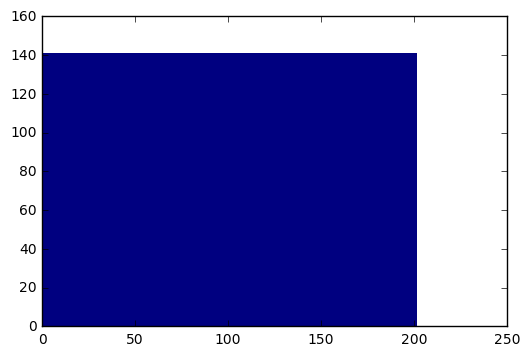

(141, 201)


In [117]:
#fig=plt.figure(figsize=(10.0,3.0))
#axes1=fig.add_subplot(1,2,1)
axes2=fig.add_subplot(1,2,2)
axes1.set_ylabel('SST')
axes1.set_xlabel('Time')
plt.pcolormesh(ds.ssh[100,:,:])
#axes1.plot(shla[:,-1],'or')
plt.show()
print(ds.ssh[100,:,:].shape)
#fig.savefig('test%s.pdf' %dst)

plt.gcf().clear()